In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv')
# data.head(10)

In [3]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
print(data.value_counts(['Embarked']))
print(data.value_counts(['Survived']))

Embarked
S           270
C           102
Q            46
Name: count, dtype: int64
Survived
0           266
1           152
Name: count, dtype: int64


In [5]:
data['Fare'] = data['Fare'].fillna(3.445)

In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
data = data.dropna(subset=['Age', 'Cabin'], how='all')
#Removes empty values where age and cabin are empty

In [8]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              4
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          245
Embarked         0
dtype: int64


In [9]:
data = data.dropna(subset=['Age'])  # Removes rows where 'Age' is NaN

In [10]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          245
Embarked         0
dtype: int64


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1100.063253,0.382530,2.144578,30.272590,0.481928,0.397590,40.869024
std,122.763173,0.486739,0.846283,14.181209,0.874084,0.810651,61.170698
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1099.500000,0.000000,2.000000,27.000000,0.000000,0.000000,15.950000
75%,1210.250000,1.000000,3.000000,39.000000,1.000000,1.000000,40.160425
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


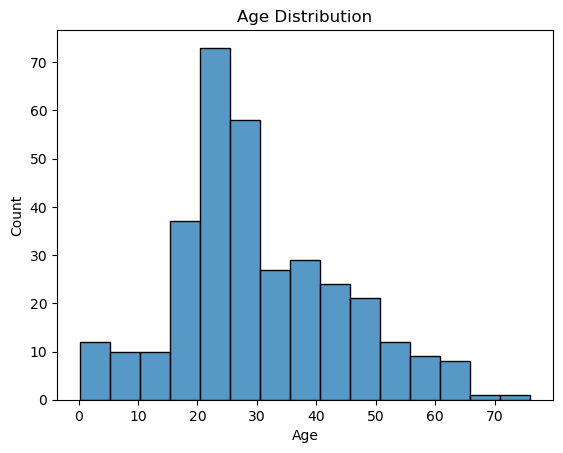

In [12]:
sns.histplot(data['Age'])
plt.title("Age Distribution")
plt.savefig('Age Distribution.png', dpi=300)
plt.show()

# sns.countplot(x='Survived', data=data)
# plt.title("Survival Count")
# plt.show()

# sns.heatmap(data.corr(), annot=True)
# plt.title("Correlation Heatmap")
# plt.show()

In [13]:
data = data.drop_duplicates(subset=['Name'], keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [16]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1


In [17]:
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Pclass'] = label_encoder.fit_transform(data['Pclass'])  # Converts 1, 2, 3 into 0, 1, 2

# Label Encoding for Sex
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Converts 'male' -> 1, 'female' -> 0
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,0,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,1,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,0,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,0,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,1,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,2,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,3,Miss
411,1303,1,0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,Q,2,Mrs
412,1304,1,2,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,NaN,S,1,Miss
414,1306,1,0,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,0,2,"Kelly, Mr. James",1,0.298549,0,0,330911,-0.540940,NaN,Q,1,Mr
1,893,1,2,"Wilkes, Mrs. James (Ellen Needs)",0,1.181328,1,0,363272,-0.554516,NaN,S,2,Mrs
2,894,0,1,"Myles, Mr. Thomas Francis",1,2.240662,0,0,240276,-0.510516,NaN,Q,1,Mr
3,895,0,2,"Wirz, Mr. Albert",1,-0.231118,0,0,315154,-0.527297,NaN,S,1,Mr
4,896,1,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.584229,1,1,3101298,-0.467947,NaN,S,3,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,2,"Peacock, Miss. Treasteall",0,-1.926053,1,1,SOTON/O.Q. 3101315,-0.443593,NaN,S,3,Miss
411,1303,1,0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,0.475105,1,0,19928,0.804391,C78,Q,2,Mrs
412,1304,1,2,"Henriksson, Miss. Jenny Lovisa",0,-0.160496,0,0,347086,-0.541828,NaN,S,1,Miss
414,1306,1,0,"Oliva y Ocana, Dona. Fermina",0,0.616350,0,0,PC 17758,1.113828,C105,C,1,Dona


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].median())  # Use median for Age
df["Fare"] = df["Fare"].fillna(df["Fare"].median())  # Use median for Fare
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])  # Use mode for Embarked

# Encode categorical variables (Sex and Embarked)
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=["Survived"])  # Features (exclude target column)
y = df["Survived"]  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_tree))

# Export the trained Decision Tree to a .dot file
export_graphviz(tree, out_file='decision_tree.dot', 
                feature_names=X.columns, 
                class_names=sorted(y.unique().astype(str)), 
                label='all', 
                rounded=True, filled=True)



Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

